In [2]:
!pip install mnist

In [0]:
import numpy as np
import mnist
np.random.seed(42)

In [0]:
X_train,Y_train = mnist.train_images(),mnist.train_labels()
X_test,Y_test = mnist.test_images(),mnist.test_labels()
num_classes = 10
Y_1hot_train = np.eye(num_classes)[Y_train]
Y_1hot_test = np.eye(num_classes)[Y_test]

In [0]:
#Pre-processing
X_train,X_test = X_train/255.0,X_test/255.0

In [0]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

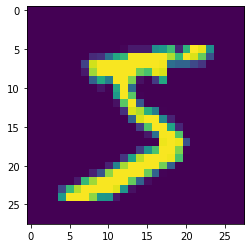

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def showdisplay(img,process = False):
  '''
  display imae in pyplot
  '''
  if process == True:
    img = img * 255
  img = img.astype('uint8')
  plt.imshow(img)

sample = X_train[0]
showdisplay(sample,True)

In [0]:
import tensorflow
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Model,Sequential

![LeNet5 Architecture from [Link](https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a)](https://miro.medium.com/max/906/1*cPAmSB9nziZPI73VC5HAHg.png)

In [0]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [0]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
callbacks = [tensorflow.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss'),tensorflow.keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=1)]

In [31]:
model.fit(X_train,Y_train,batch_size=32,epochs=10,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 691us/sample - loss: 0.4600 - acc: 0.8584 - val_loss: 0.1309 - val_acc: 0.9594
Epoch 2/10
60000/60000 [==============================] - 41s 687us/sample - loss: 0.1247 - acc: 0.9624 - val_loss: 0.0881 - val_acc: 0.9729
Epoch 3/10
60000/60000 [==============================] - 41s 689us/sample - loss: 0.0899 - acc: 0.9723 - val_loss: 0.0711 - val_acc: 0.9784
Epoch 4/10
60000/60000 [==============================] - 41s 686us/sample - loss: 0.0729 - acc: 0.9772 - val_loss: 0.0580 - val_acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 41s 682us/sample - loss: 0.0627 - acc: 0.9804 - val_loss: 0.0544 - val_acc: 0.9829
Epoch 6/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0550 - acc: 0.9828 - val_loss: 0.0465 - val_acc: 0.9854
Epoch 7/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0495 - acc: 0.9849 

In [0]:
model.save('weights.h5')
